# German traffic sign classification

### Aufgaben:
1. Schauen Sie sich das Notebook „data exploration.ipynb“ an, um eine Idee von dem „German Traffic Sign Recognition“-Datensatz zu bekommen.
2.	Trainieren Sie verschiedene Modelle mit unterschiedlichen Architekturen. Erstellen Sie mindestens drei unterschiedliche Modelle. Das Notebook „student_task.ipynb“ gibt eine grobe Struktur vor, wie Sie Ihre Modelle trainieren können.
3.	Vergleichen Sie die Modelle mithilfe einer Konfusionsmatrix und wählen Sie das beste Modell aus. Jedes Modell sollte mindestens eine Accuracy von 90 % auf dem Validierungsdatensatz erreichen. Begründen Sie Ihre Auswahl anhand der Konfusionsmatrix. Gehen Sie in Ihrer Analyse auf folgende Fragen ein:
    - „Welche Klassen werden besonders häufig verwechselt?“
    - „Zeigt ein Modell auffällige Schwächen bei bestimmten Verkehrszeichen?“
    - „Gibt es Klassen, die von allen Modellen zuverlässig erkannt werden?“
    - „Ist das Modell mit der höchsten Accuracy auch in der Konfusionsmatrix am überzeugendsten?“
4.	Testen sie das finale Modell und erstellen sie eine Konfusionsmatrix. Welche Unterschiede fallen Ihnen im Vergleich zu den Ergebnissen auf den Validierungsdaten auf?
5.	Erstellen Sie eine kurze Präsentation, die Ihre Ergebnisse vorstellt. Laden Sie die Präsentation, Ihren Code und Ihr finales Modell in der ILU-Gruppe hoch.
6.	Bereiten sie sich auf einen Multiple Choice Test (MCT) zu diesem Praktikum vor. Sie müssen bei der Praktikumsabgabe keine Präsentation halten.



# Import libraries and datasets

In [197]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

In [198]:
with open("/train.p", mode='rb') as training_data_file:
        train = pickle.load(training_data_file)
with open("/valid.p", mode='rb') as validation_data_file:
        valid = pickle.load(validation_data_file)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [201]:
# Normalize image to [0, 1]
X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

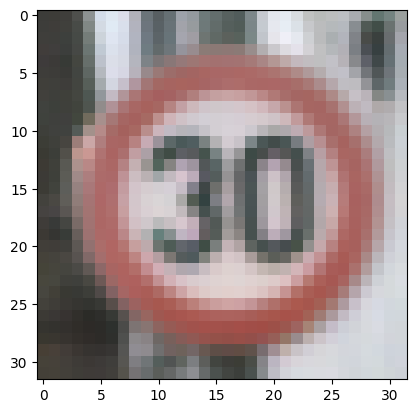

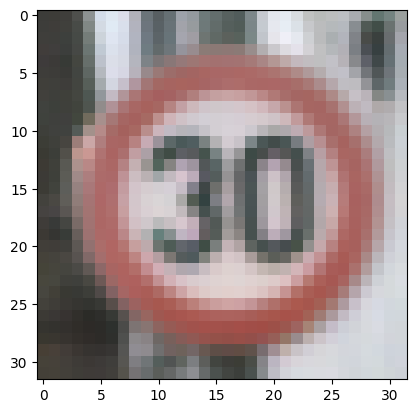

In [202]:
# Check that the images have been correctly converted and normalised
i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

# Create the Convolutional Neural Network with keras
For example a CNN that recognises handwritten numbers: [https://adamharley.com/nn_vis/cnn/2d.html](https://adamharley.com/nn_vis/cnn/2d.html)
Here a fully connected neural network that also recognise handwritten numbers: [https://adamharley.com/nn_vis/mlp/2d.html](https://adamharley.com/nn_vis/mlp/2d.html)

Use model.add() to add a [Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers) to your model. Here is a list of layers that might be useful:
- [Convolution Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): layers.Conv2D()
- [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D): layers.AveragePooling2D()
- [Max Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): layers.MaxPool2D()
- [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout): layers.Dropout()
- [Flattens](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the input. 2D -> 1D: layers.Flatten()
- [Densely-connected NN layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): layers.Dense()

In [216]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.SpatialDropout2D(0.3))
# kein spacial dropout zwischen layers

# Block 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.SpatialDropout2D(0.3))

model.add(layers.GlobalAveragePooling2D())


model.add(layers.Dropout(rate=0.4))
# Output Layer
model.add(layers.Dense(units=43, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Exception ignored in: <function _xla_gc_callback at 0x79e00dc86020>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_42            │ (None, 16, 16, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_43            │ (None, 8, 8, 64)       │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_16     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,371 (450.67 KB)

 Trainable params: 115,371 (450.67 KB)

 Non-trainable params: 0 (0.00 B)

# Compile your model
When you want, you can change the [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) or the [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [204]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train your model
The documentation of the fit method: [https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [205]:
# TODO: Choose the batch size and the epochs
history = model.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 64,
                    epochs = 100,
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

Epoch 1/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.0741 - loss: 3.5016 - val_accuracy: 0.1705 - val_loss: 2.9670
Epoch 2/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1926 - loss: 2.8709 - val_accuracy: 0.2655 - val_loss: 2.3693
Epoch 3/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3246 - loss: 2.2599 - val_accuracy: 0.4363 - val_loss: 1.8226
Epoch 4/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4158 - loss: 1.8482 - val_accuracy: 0.5324 - val_loss: 1.5243
Epoch 5/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4815 - loss: 1.5949 - val_accuracy: 0.6054 - val_loss: 1.3112
Epoch 6/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5569 - loss: 1.3717 - val_accuracy: 0.7147 - val_loss: 1.0313
Epoch 7/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6236 - loss: 1.1726 - val_accuracy: 0.7642 - val_loss: 0.8209
Epoch 8/100
544/544 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6909 - loss: 0.9753 - val_ac

# Visualize Training

In [206]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [207]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

Text(0.5, 1.0, 'Training and Validation loss')

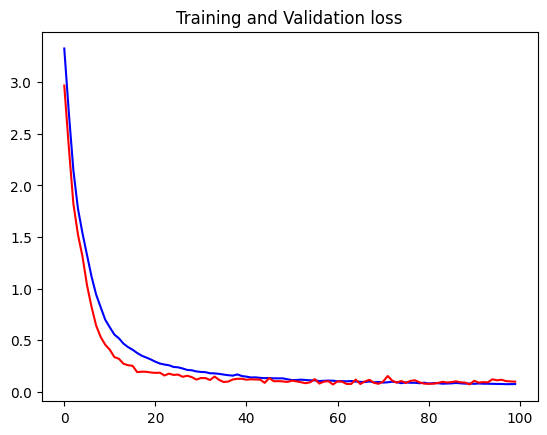

In [208]:
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_40            │ (None, 16, 16, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_41            │ (None, 8, 8, 64)       │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_15     │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,115 (1.32 MB)

 Trainable params: 115,371 (450.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,744 (901.35 KB)

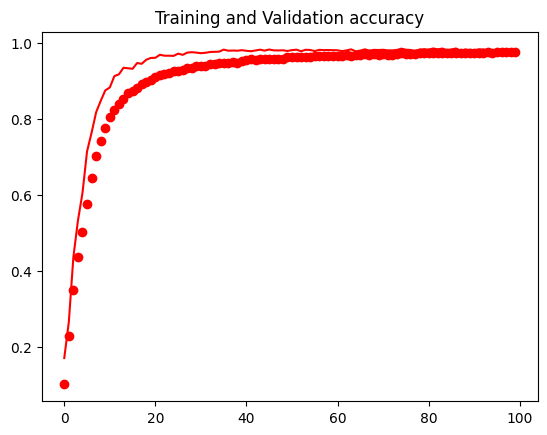

In [209]:
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
model.summary()


# Save your model
Create a folder for your models

In [213]:
model.save('saved_model/modell_name.h5')

# Load your model

In [218]:
model = tf.keras.models.load_model('saved_model/final_modell.h5')


In [219]:


loss, accuracy = model.evaluate(X_valid_norm, y_valid, verbose=0)

print(f'Validierungsgenauigkeit: {accuracy*100:.2f}%')
print(f'Validierungsverlust: {loss:.4f}')

Validierungsgenauigkeit: 98.16%
Validierungsverlust: 0.0985


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


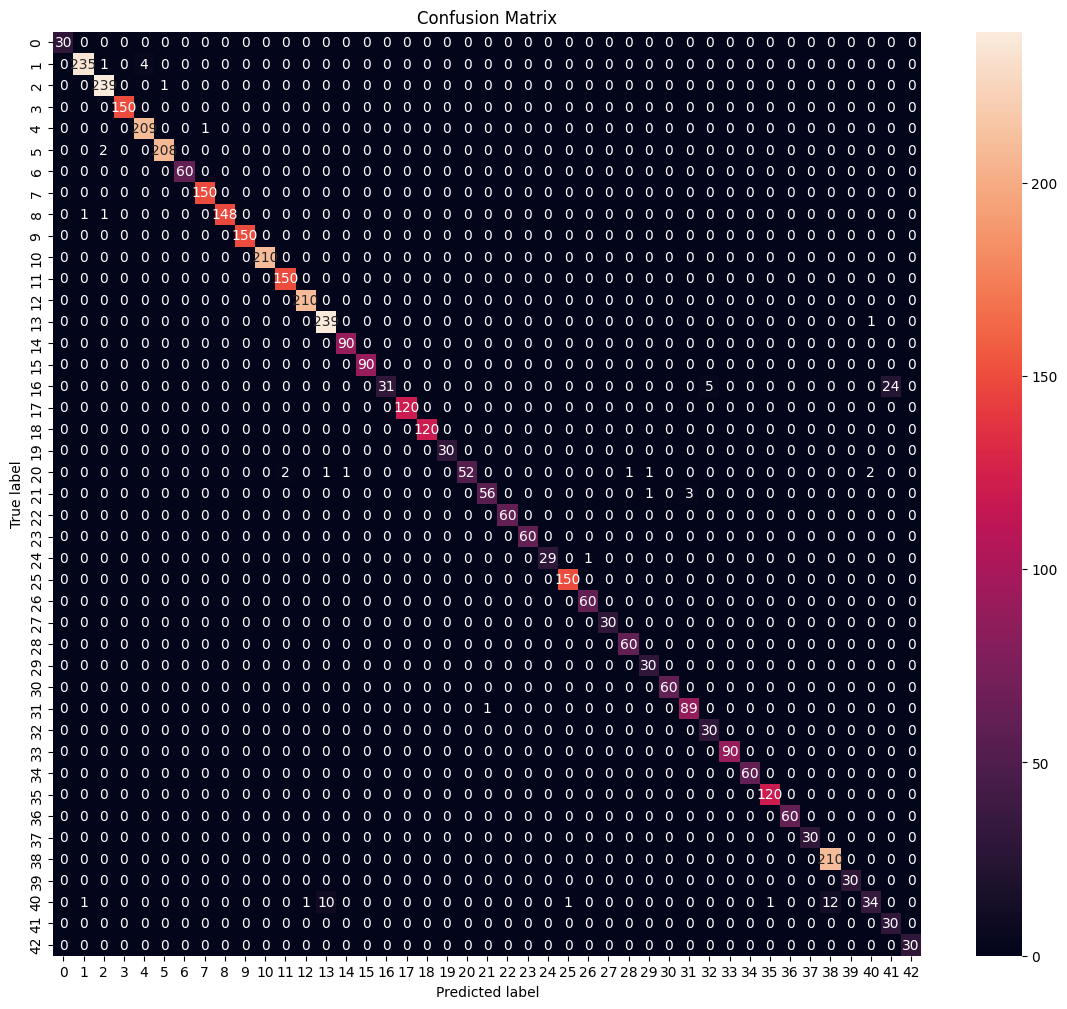

In [220]:
from sklearn.metrics import confusion_matrix

# Normalize image to [0, 1]
X_valid_norm = X_valid / 255

y_pred_probs = model.predict(X_valid_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()